In [14]:
#Importamos Librerias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, find_peaks
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import csv
import seaborn as sns
import math
import scipy
from scipy import stats


In [39]:
# %% Datos de baseline
signalsb = pd.read_csv('baseline.dat', delimiter=' ', names=['timestamp', 'counter', 'eeg', 'attention', 'meditation', 'blinking'])
datab = signalsb.values

# %% Datos de pestaneo
signalsp = pd.read_csv('pestaneos.dat', delimiter=' ', names=['timestamp', 'counter', 'eeg', 'attention', 'meditation', 'blinking'])
datap = signalsp.values

# %% Datos de Risa
signalsr = pd.read_csv('risa.dat', delimiter=' ', names=['timestamp', 'counter', 'eeg', 'attention', 'meditation', 'blinking'])
datar = signalsr.values

# %% Datos de Bethoven
signalsbe = pd.read_csv('bethoven.dat', delimiter=' ', names=['timestamp', 'counter', 'eeg', 'attention', 'meditation', 'blinking'])
databe = signalsbe.values

# %% Datos de Deathmetal
signalsd = pd.read_csv('deathmetal.dat', delimiter=' ', names=['timestamp', 'counter', 'eeg', 'attention', 'meditation', 'blinking'])
datad = signalsd.values

# %% Datos de Deathmetal
signalst = pd.read_csv('truco_dos.dat', delimiter=' ', names=['timestamp', 'counter', 'eeg', 'attention', 'meditation', 'blinking'])
datat = signalst.values

In [16]:
signalsd

,timestamp,counter,eeg,attention,meditation,blinking
0,1.732233e+09,39,-39,0,0,0
1,1.732233e+09,40,-36,0,0,0
2,1.732233e+09,41,-39,0,0,0
3,1.732233e+09,42,-46,0,0,0
4,1.732233e+09,43,-41,0,0,0
...,...,...,...,...,...,...
29864,1.732233e+09,35,16,4,63,0
29865,1.732233e+09,36,29,4,63,0
29866,1.732233e+09,37,42,4,63,0
29867,1.732233e+09,38,51,4,63,0


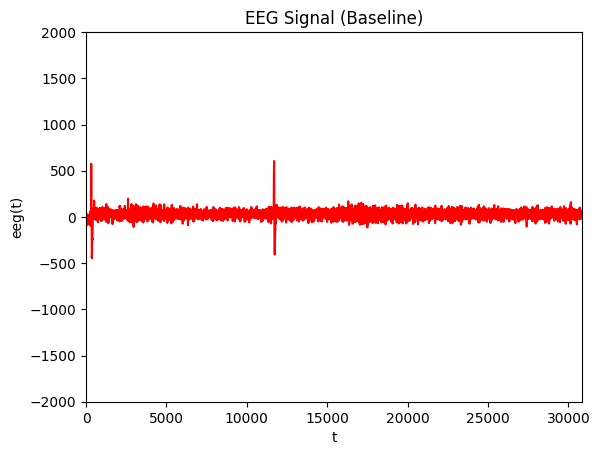

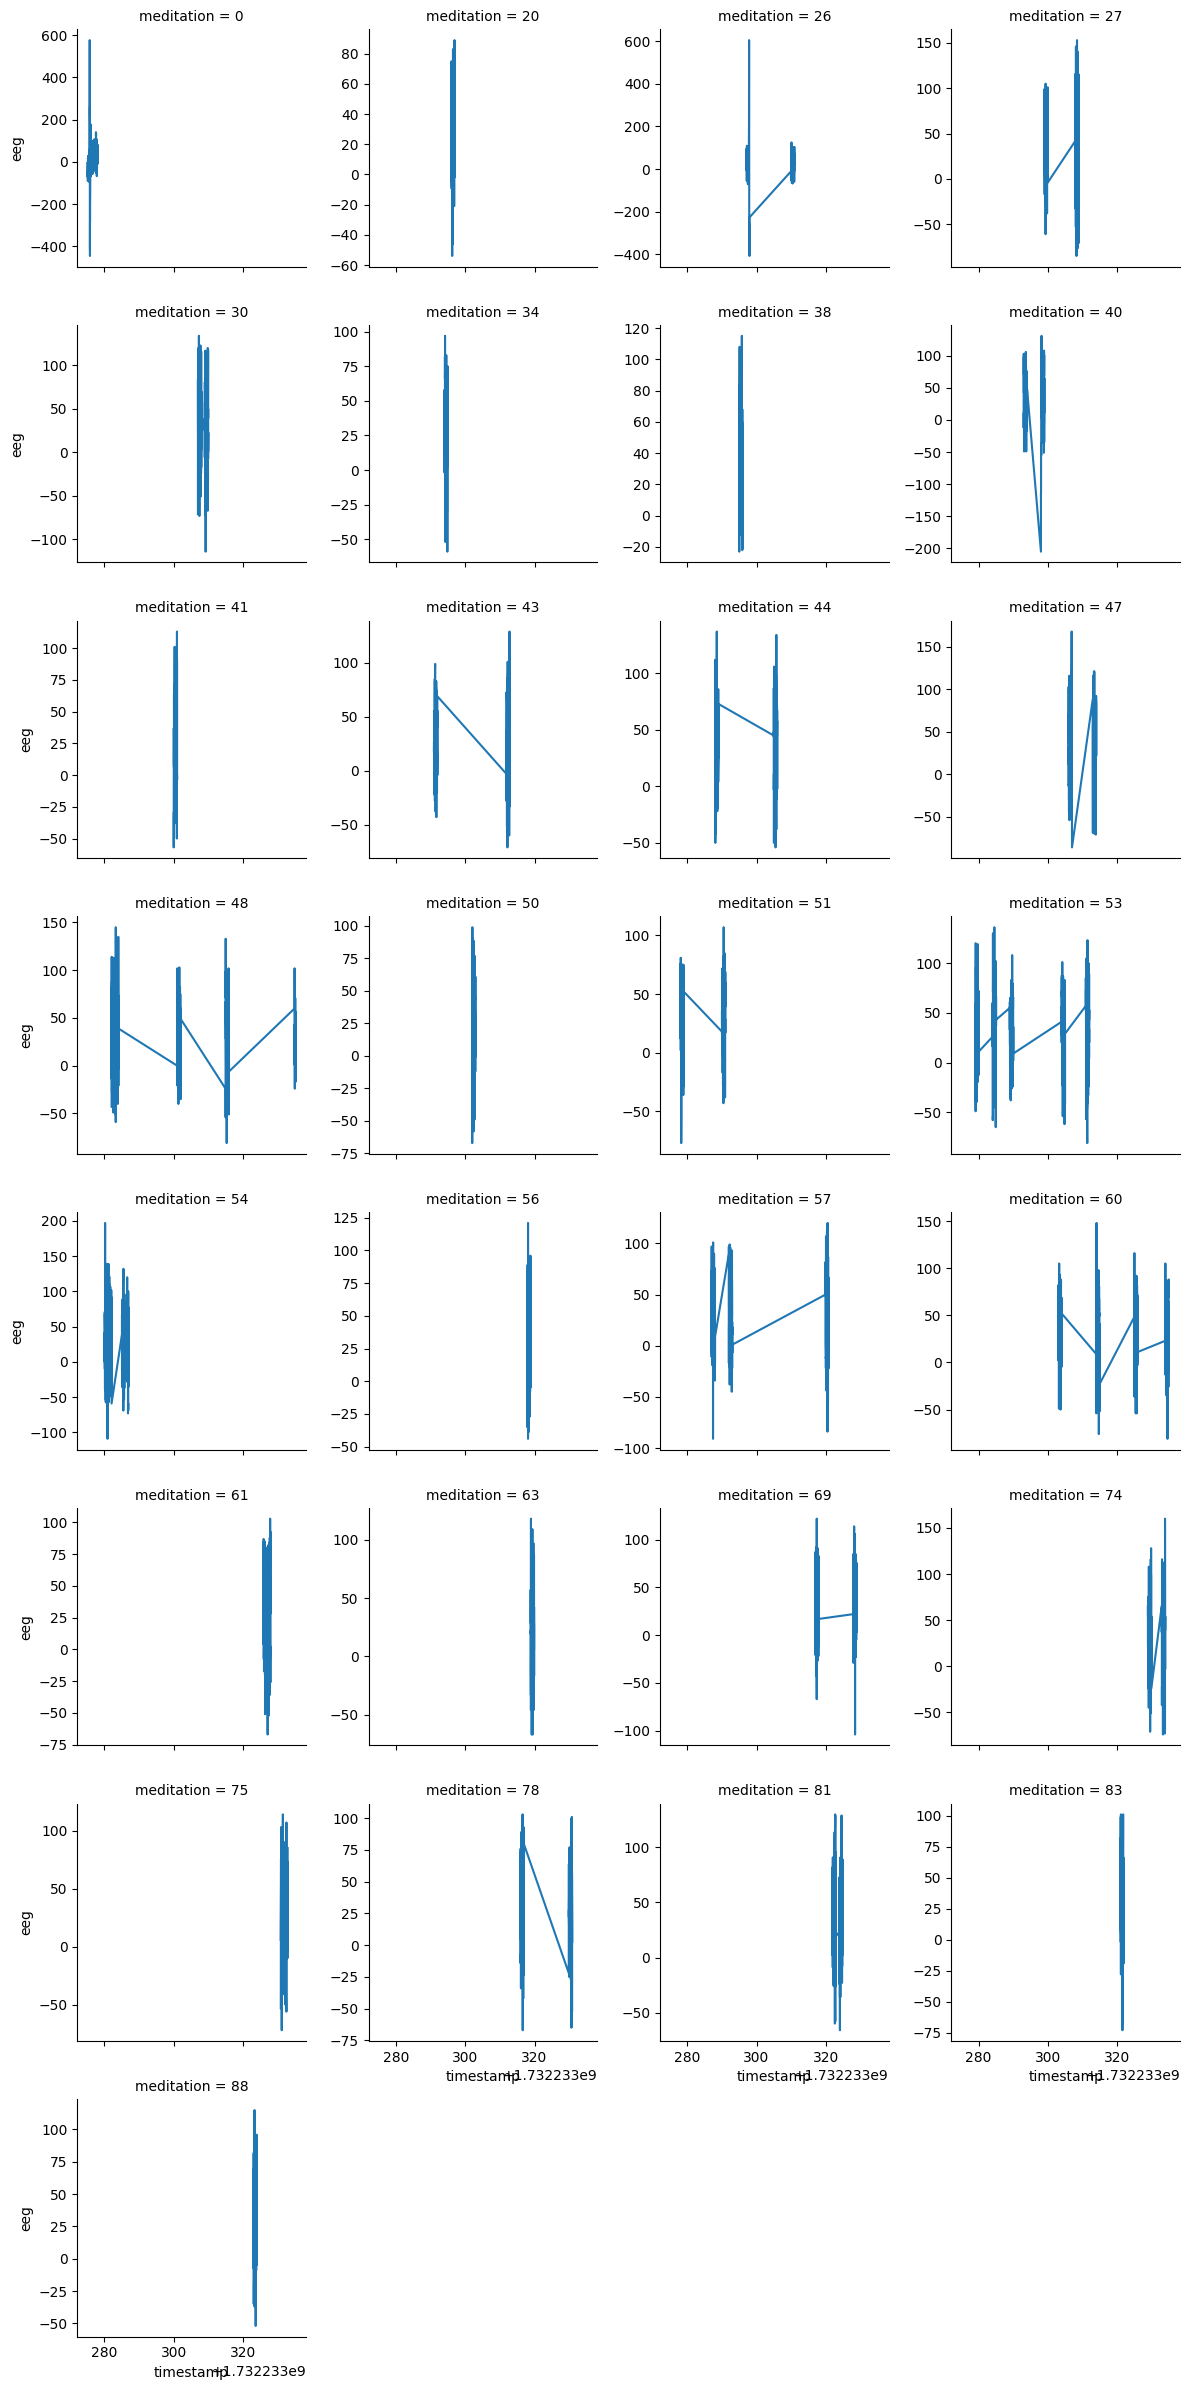

In [36]:
# Graficamos las señales originales de cada arhivo y visualizamos las diferentes actividades a lo largo del tiempo

# Baseline
eeg = datab[:, 2]
plt.plot(eeg, 'r', label='EEG')
plt.xlabel('t')
plt.ylabel('eeg(t)')
plt.title('EEG Signal (Baseline)')
plt.ylim([-2000, 2000])
plt.xlim([0, len(eeg)])
plt.show()

g = sns.FacetGrid(signalsb, col="meditation", col_wrap=4, sharey=False)
g.map(sns.lineplot, "timestamp", "eeg")
plt.show()


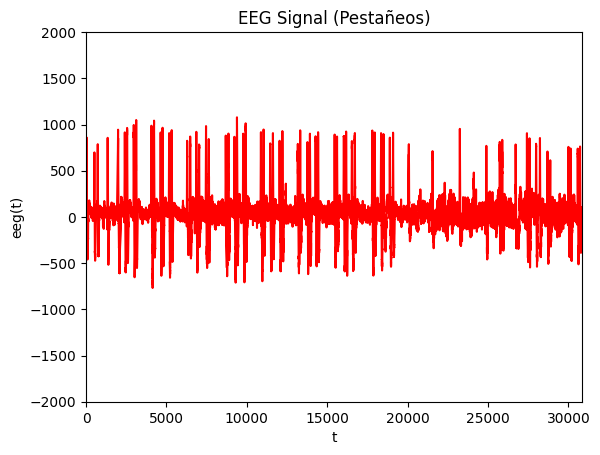

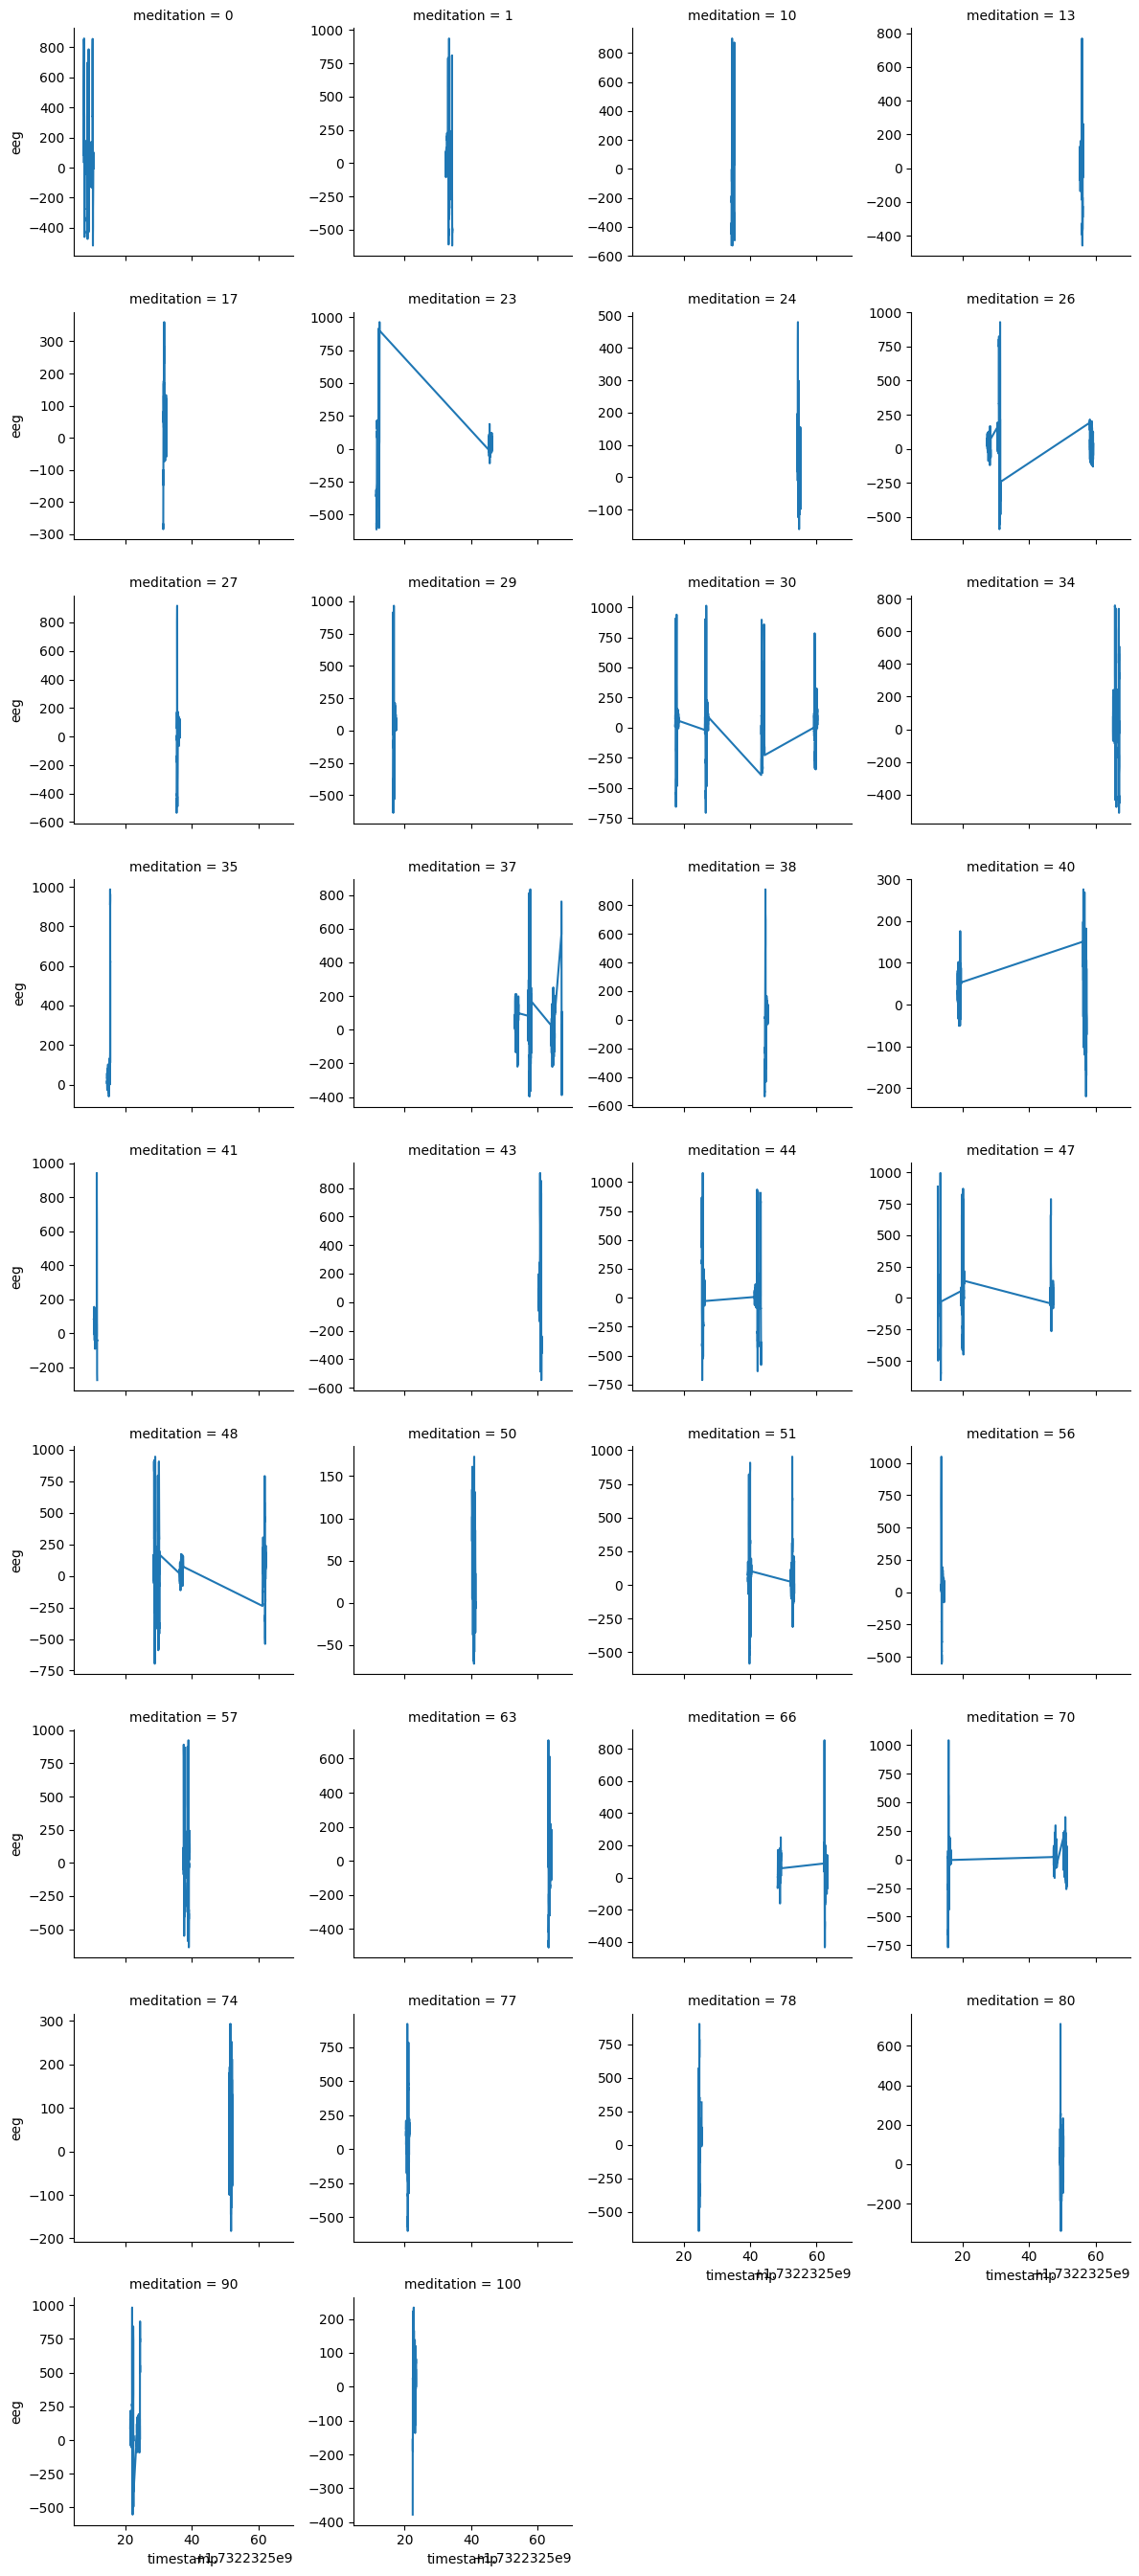

In [38]:
# Graficamos las señales originales de cada arhivo y visualizamos las diferentes actividades a lo largo del tiempo

# Baseline
eeg = datap[:, 2]
plt.plot(eeg, 'r', label='EEG')
plt.xlabel('t')
plt.ylabel('eeg(t)')
plt.title('EEG Signal (Pestañeos)')
plt.ylim([-2000, 2000])
plt.xlim([0, len(eeg)])
plt.show()

g = sns.FacetGrid(signalsp, col="meditation", col_wrap=4, sharey=False)
g.map(sns.lineplot, "timestamp", "eeg")
plt.show()

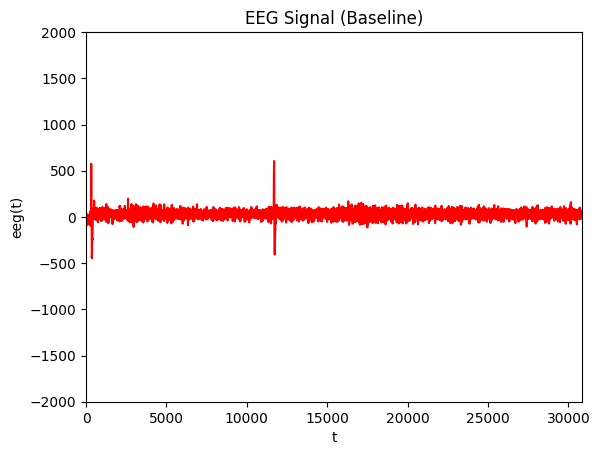

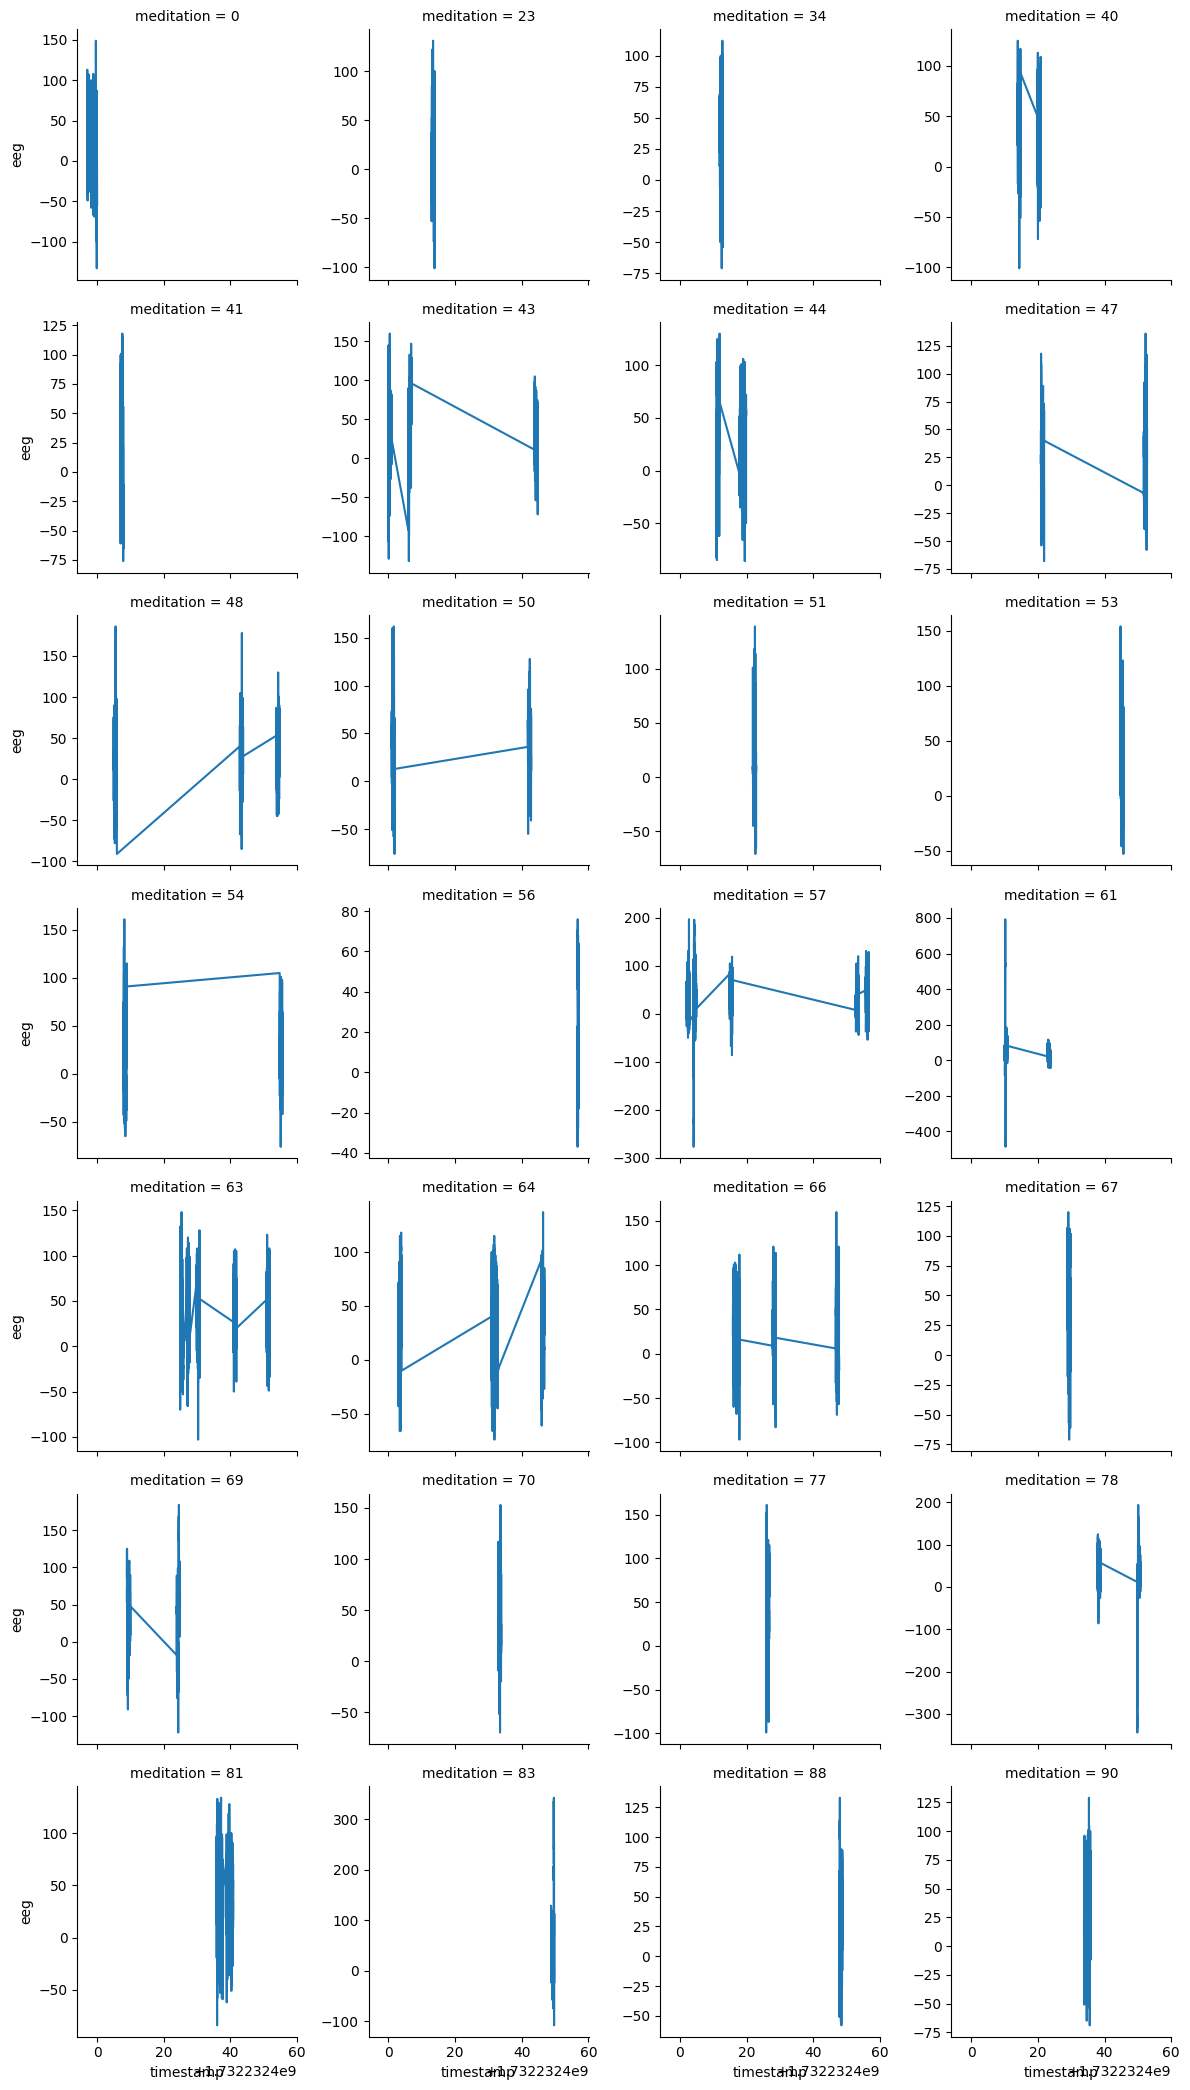

In [40]:
# Graficamos las señales originales de cada arhivo y visualizamos las diferentes actividades a lo largo del tiempo

# Baseline
eeg = databe[:, 2]
plt.plot(eeg, 'r', label='EEG')
plt.xlabel('t')
plt.ylabel('eeg(t)')
plt.title('EEG Signal (Baseline)')
plt.ylim([-2000, 2000])
plt.xlim([0, len(eeg)])
plt.show()

g = sns.FacetGrid(signalsb, col="meditation", col_wrap=4, sharey=False)
g.map(sns.lineplot, "timestamp", "eeg")
plt.show()


In [43]:
#Realizaremos el analisis de la cantidad de pestañeos:

results = []

# Open blinking.dat file.
with open('pestaneos.dat') as inputfile:
    for row in csv.reader(inputfile):
        rows = row[0].split(' ')
        results.append(rows[1:])
        
results = np.asarray(results)
results = results.astype(int)



File Length:30850
Some values from the dataset:

[[ 48  85   0   0   0]
 [ 49  90   0   0   0]
 [ 50 101   0   0   0]
 [ 51  89   0   0   0]
 [ 52  75   0   0   0]
 [ 53  65   0   0   0]
 [ 54  76   0   0   0]
 [ 55 102   0   0   0]
 [ 56 114   0   0   0]
 [ 57  97   0   0   0]]
Matrix dimension: (30850, 5)
EEG Vector Metrics

Length: 30849
Max value: 1078
Min value: -769
Range: 1847
Average value: 30.763687639793833
Variance: 53049.989538814676
Std: 230.32583341608617


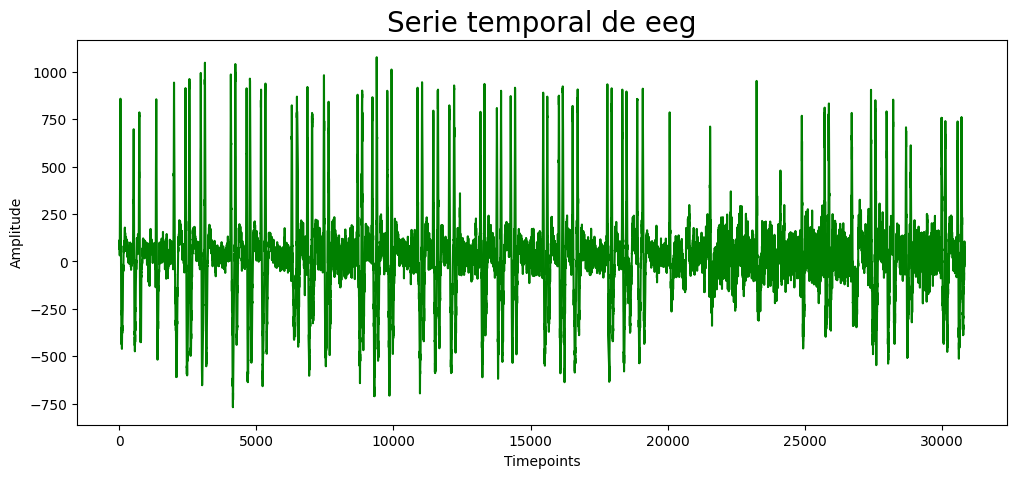

In [44]:
# Identificamos y seleccionamos la variable EEG
eeg = results[1:,1]

print('File Length:'+str(len(results)))
print("Some values from the dataset:\n")
print(results[0:10,])
print("Matrix dimension: {}".format(results.shape))
print("EEG Vector Metrics\n")
print("Length: {}".format(len(eeg)))
print("Max value: {}".format(eeg.max()))
print("Min value: {}".format(eeg.min()))
print("Range: {}".format(eeg.max()-eeg.min()))
print("Average value: {}".format(eeg.mean()))
print("Variance: {}".format(eeg.var()))
print("Std: {}".format(math.sqrt(eeg.var())))
plt.figure(figsize=(12,5))
plt.plot(eeg,color="green")
plt.ylabel("Amplitude",size=10)
plt.xlabel("Timepoints",size=10)
plt.title("Serie temporal de eeg",size=20)
plt.show()

normality = NormaltestResult(statistic=4305.753890522216, pvalue=0.0)


/tmp/ipykernel_50/1497903675.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(eeg)


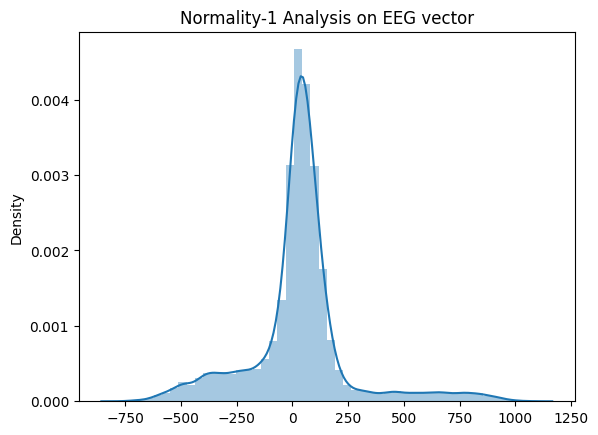

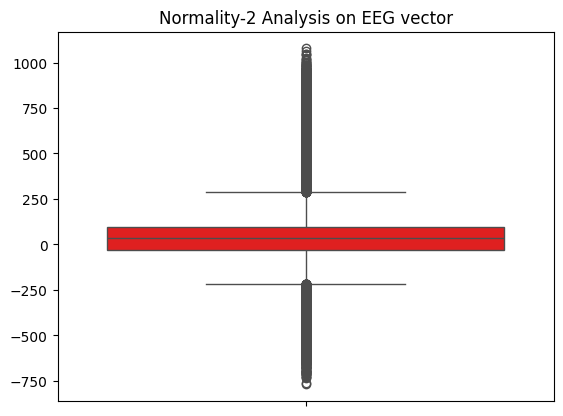

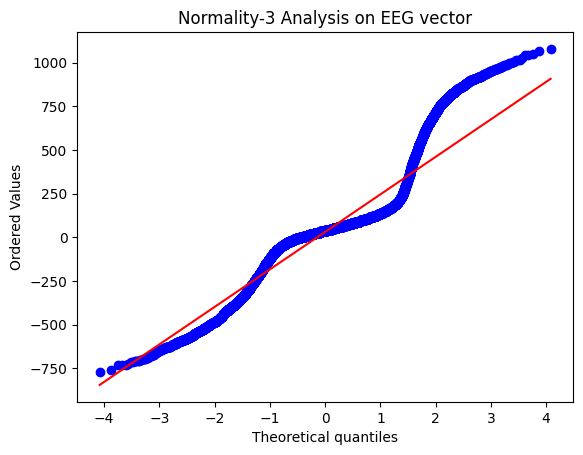

In [21]:
# Prueba de normalidad
print('normality = {}'.format(scipy.stats.normaltest(eeg)))
sns.distplot(eeg)
plt.title("Normality-1 Analysis on EEG vector")
plt.show()
sns.boxplot(eeg,color="red")
plt.title("Normality-2 Analysis on EEG vector")
plt.show()
res = stats.probplot(eeg, plot = plt)
plt.title("Normality-3 Analysis on EEG vector") 
plt.show()

Upper Threshold: 721
Lower Threshold: -660


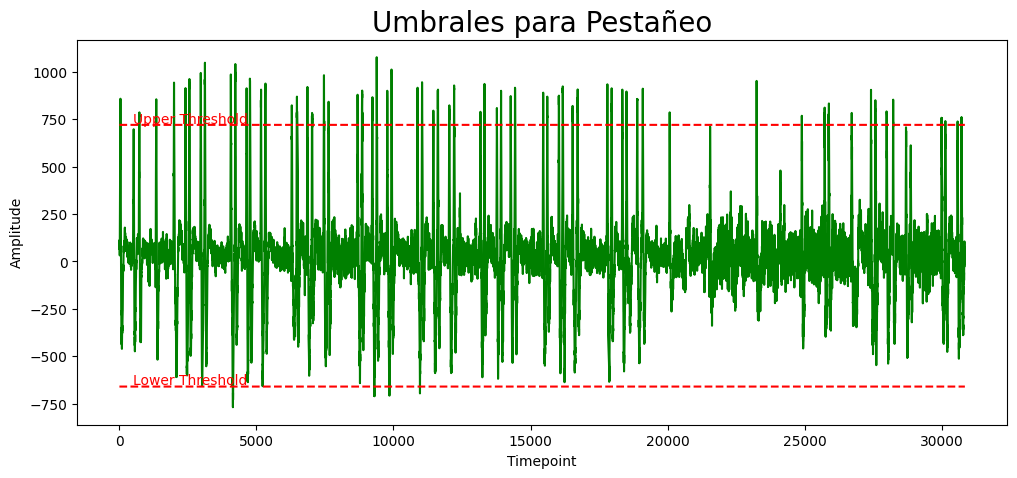

In [45]:
#Calcuolamos los umbrales superiores e inferiores para determinar qué es un pestañeo y qué no
umbral_superior=int(eeg.mean()+3*eeg.std())
print("Upper Threshold: {}".format(umbral_superior))
umbral_inferior=int(eeg.mean()-3*eeg.std())
print("Lower Threshold: {}".format(umbral_inferior))
plt.figure(figsize=(12,5))
plt.plot(eeg,color="green")
plt.plot(np.full(len(eeg),umbral_superior),'r--')
plt.plot(np.full(len(eeg),umbral_inferior),'r--')
plt.ylabel("Amplitude",size=10)
plt.xlabel("Timepoint",size=10)
plt.title("Umbrales para Pestañeo",size=20)
plt.annotate("Upper Threshold",xy=(500,umbral_superior+10),color="red")
plt.annotate("Lower Threshold",xy=(500,umbral_inferior+10),color="red")
plt.show()

31
723
1339
1987
2408
2547
2962
3112
4060
4222
4635
4757
5160
5319
5334
6288
6469
6854
7025
7035
7456
7471
7630
8684
8848
8862
9221
9382
9771
9922
10871
11036
11450
11611
12032
12208
13171
13315
13770
13923
14274
14432
15454
15468
15606
16029
16170
16531
16711
17795
17952
18347
18498
18890
19091
20076
23245
24896
25730
25736
25879
25884
26719
27422
27579
27989
28227
28230
29997
30004
30136
30582
30721
30725
Blinking counter: 74


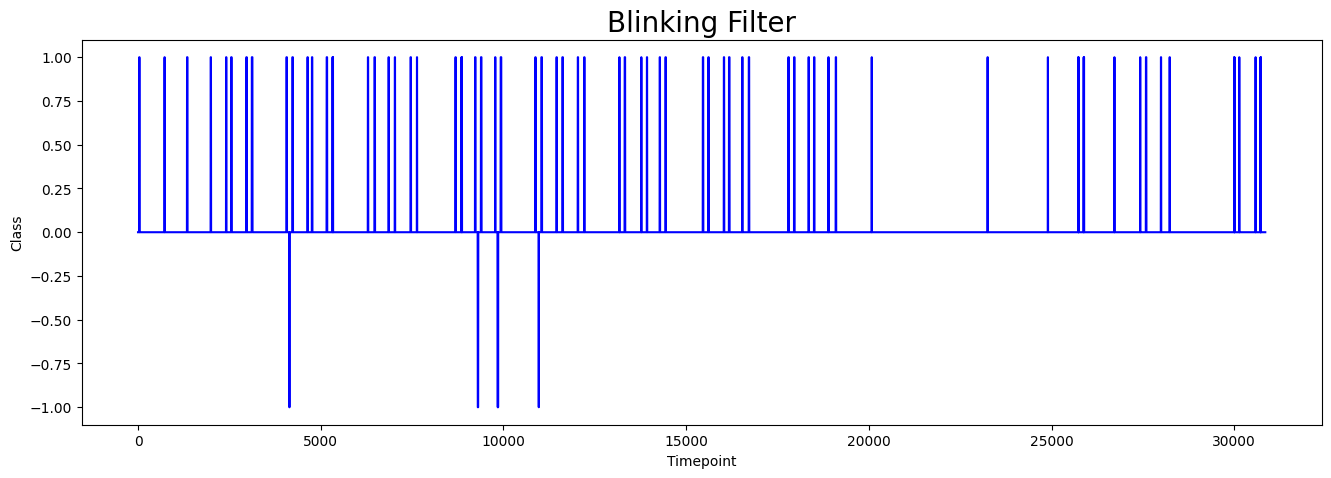

In [46]:
#Contamos los eventos de pestañeos

filtro_eeg=[]
contador=0
for i in range(len(eeg)):
    if i==0:
        filtro_eeg.append(0)
    elif eeg[i]>umbral_superior:
        filtro_eeg.append(1)
        if eeg[i-1]<=umbral_superior:
            print(i)
            contador=contador+1
    elif eeg[i]<umbral_inferior:
        filtro_eeg.append(-1)
    else:
        filtro_eeg.append(0)
        
print("Blinking counter: {}".format(contador))
filtro_eeg=np.asarray(filtro_eeg)
plt.figure(figsize=(16,5))
plt.plot(filtro_eeg,color="blue")
plt.title("Blinking Filter",size=20)
plt.ylabel("Class",size=10)
plt.xlabel("Timepoint",size=10)
plt.show()

In [47]:
#Realizamos el mismo analisis para entender cuando hace la seña del 7 en en el truco


results7 = []

# Open blinking.dat file.
with open('truco_siete.dat') as inputfile:
    for row in csv.reader(inputfile):
        rows = row[0].split(' ')
        results7.append(rows[1:])
        
results7 = np.asarray(results)
results7 = results7.astype(int)

File Length:30850
Some values from the dataset:

[[ 48  85   0   0   0]
 [ 49  90   0   0   0]
 [ 50 101   0   0   0]
 [ 51  89   0   0   0]
 [ 52  75   0   0   0]
 [ 53  65   0   0   0]
 [ 54  76   0   0   0]
 [ 55 102   0   0   0]
 [ 56 114   0   0   0]
 [ 57  97   0   0   0]]
Matrix dimension: (30850, 5)
EEG Vector Metrics

Length: 30849
Max value: 1078
Min value: -769
Range: 1847
Average value: 30.763687639793833
Variance: 53049.989538814676
Std: 230.32583341608617


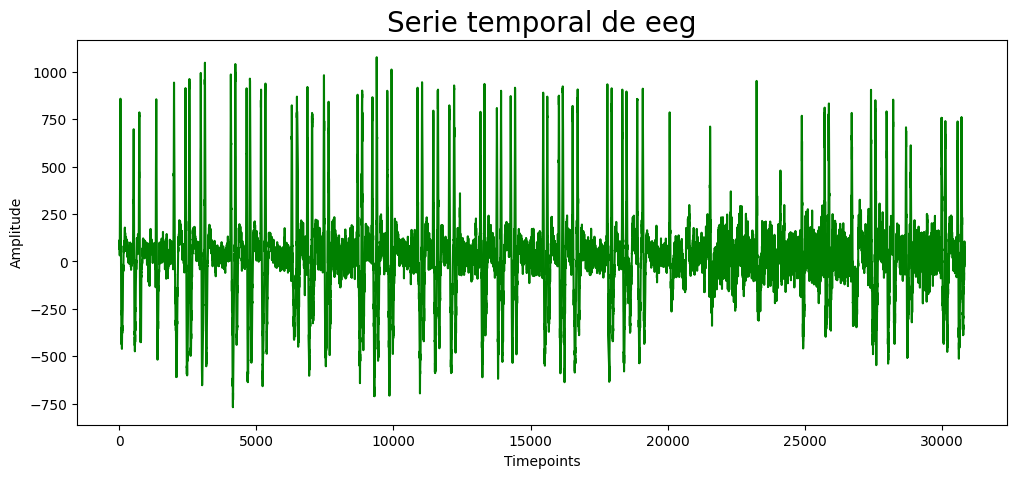

In [48]:
# Identificamos y seleccionamos la variable EEG
eeg7 = results7[1:,1]

print('File Length:'+str(len(results7)))
print("Some values from the dataset:\n")
print(results7[0:10,])
print("Matrix dimension: {}".format(results7.shape))
print("EEG Vector Metrics\n")
print("Length: {}".format(len(eeg7)))
print("Max value: {}".format(eeg7.max()))
print("Min value: {}".format(eeg7.min()))
print("Range: {}".format(eeg7.max()-eeg7.min()))
print("Average value: {}".format(eeg7.mean()))
print("Variance: {}".format(eeg7.var()))
print("Std: {}".format(math.sqrt(eeg7.var())))
plt.figure(figsize=(12,5))
plt.plot(eeg7,color="green")
plt.ylabel("Amplitude",size=10)
plt.xlabel("Timepoints",size=10)
plt.title("Serie temporal de eeg",size=20)
plt.show()

Upper Threshold: 721
Lower Threshold: -660


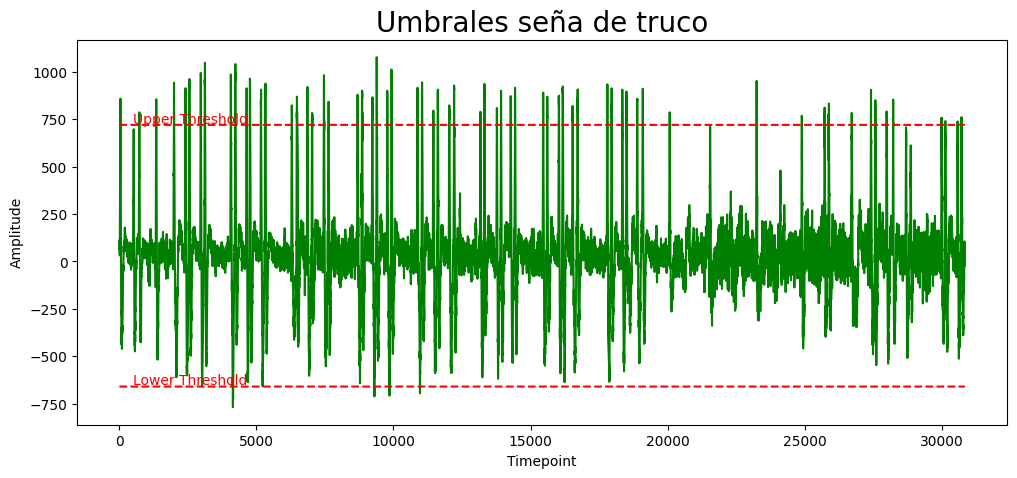

In [50]:
#Calcuolamos los umbrales superiores e inferiores para determinar qué es una seña de truco y qué no:

umbral_superior7=int(eeg7.mean()+3*eeg7.std())
print("Upper Threshold: {}".format(umbral_superior7))
umbral_inferior7=int(eeg7.mean()-3*eeg7.std())
print("Lower Threshold: {}".format(umbral_inferior7))
plt.figure(figsize=(12,5))
plt.plot(eeg7,color="green")
plt.plot(np.full(len(eeg7),umbral_superior7),'r--')
plt.plot(np.full(len(eeg7),umbral_inferior7),'r--')
plt.ylabel("Amplitude",size=10)
plt.xlabel("Timepoint",size=10)
plt.title("Umbrales seña de truco",size=20)
plt.annotate("Upper Threshold",xy=(500,umbral_superior7+10),color="red")
plt.annotate("Lower Threshold",xy=(500,umbral_inferior7+10),color="red")
plt.show()

31
723
1339
1987
2408
2547
2962
3112
4060
4222
4635
4757
5160
5319
5334
6288
6469
6854
7025
7035
7456
7471
7630
8684
8848
8862
9221
9382
9771
9922
10871
11036
11450
11611
12032
12208
13171
13315
13770
13923
14274
14432
15454
15468
15606
16029
16170
16531
16711
17795
17952
18347
18498
18890
19091
20076
23245
24896
25730
25736
25879
25884
26719
27422
27579
27989
28227
28230
29997
30004
30136
30582
30721
30725
Truco counter: 74


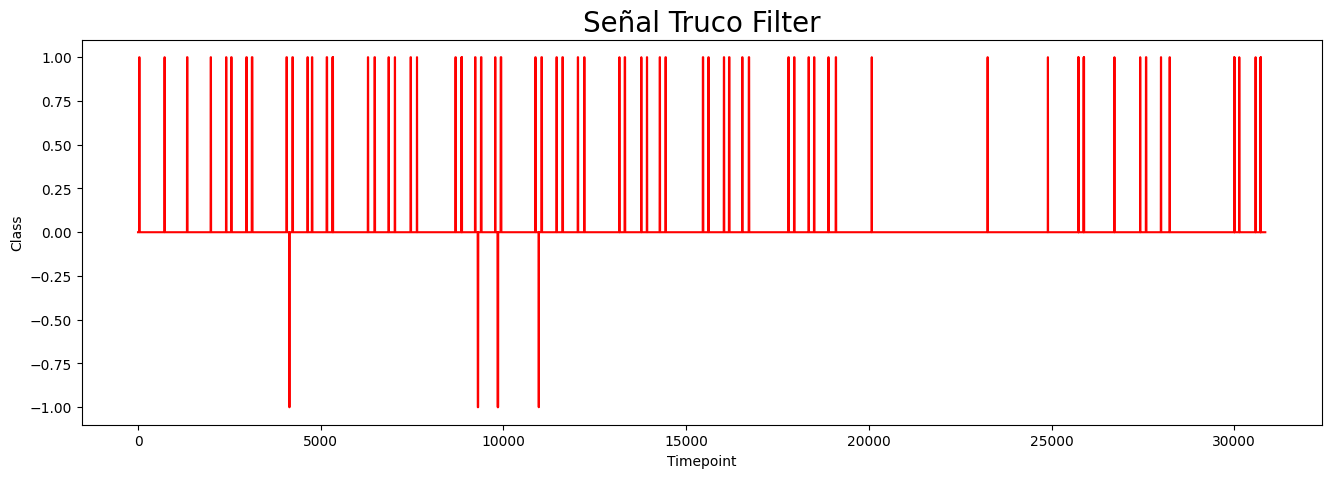

In [27]:
#Contamos los eventos de señas de truco

filtro_eeg7=[]
contador7=0
for i in range(len(eeg7)):
    if i==0:
        filtro_eeg7.append(0)
    elif eeg7[i]>umbral_superior7:
        filtro_eeg7.append(1)
        if eeg[i-1]<=umbral_superior7:
            print(i)
            contador7=contador7+1
    elif eeg[i]<umbral_inferior7:
        filtro_eeg7.append(-1)
    else:
        filtro_eeg7.append(0)
        
print("Truco counter: {}".format(contador7))
filtro_eeg7=np.asarray(filtro_eeg7)
plt.figure(figsize=(16,5))
plt.plot(filtro_eeg7,color="red")
plt.title("Señal Truco Filter",size=20)
plt.ylabel("Class",size=10)
plt.xlabel("Timepoint",size=10)
plt.show()

In [28]:
#Realizamos el mismo analisis para entender cuando sonrie


results9 = []

# Open blinking.dat file.
with open('risa.dat') as inputfile:
    for row in csv.reader(inputfile):
        rows = row[0].split(' ')
        results9.append(rows[1:])
        
results9 = np.asarray(results9)
results9 = results9.astype(int)

File Length:30860
Some values from the dataset:

[[58 43  0  0  0]
 [59 58  0  0  0]
 [60 58  0  0  0]
 [61 59  0  0  0]
 [62 68  0  0  0]
 [63 60  0  0  0]
 [64 28  0  0  0]
 [65 20  0  0  0]
 [66 54  0  0  0]
 [67 89  0  0  0]]
Matrix dimension: (30860, 5)
EEG Vector Metrics

Length: 30859
Max value: 1365
Min value: -2037
Range: 3402
Average value: 31.211899283839397
Variance: 40261.02898313565
Std: 200.65151129043522


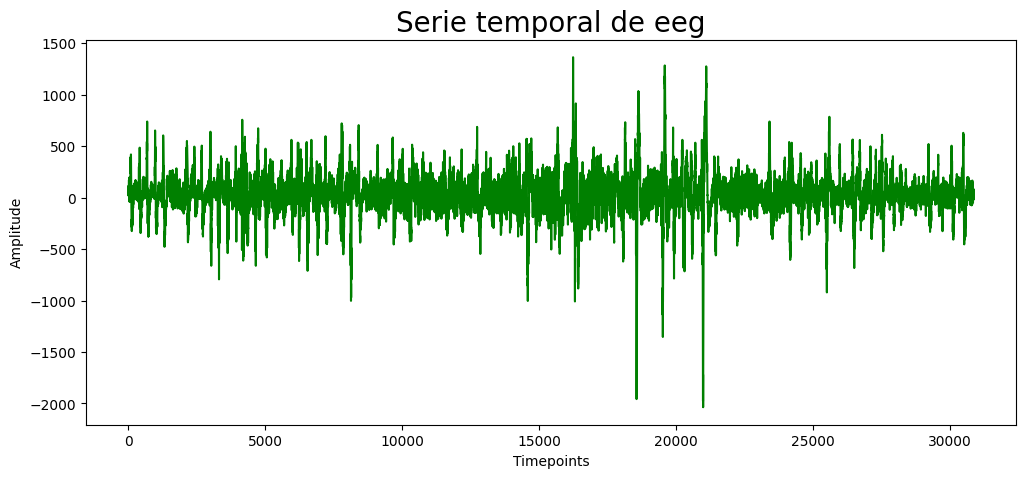

In [29]:
# Identificamos y seleccionamos la variable EEG
eeg9 = results9[1:,1]

print('File Length:'+str(len(results9)))
print("Some values from the dataset:\n")
print(results9[0:10,])
print("Matrix dimension: {}".format(results9.shape))
print("EEG Vector Metrics\n")
print("Length: {}".format(len(eeg9)))
print("Max value: {}".format(eeg9.max()))
print("Min value: {}".format(eeg9.min()))
print("Range: {}".format(eeg9.max()-eeg9.min()))
print("Average value: {}".format(eeg9.mean()))
print("Variance: {}".format(eeg9.var()))
print("Std: {}".format(math.sqrt(eeg9.var())))
plt.figure(figsize=(12,5))
plt.plot(eeg9,color="green")
plt.ylabel("Amplitude",size=10)
plt.xlabel("Timepoints",size=10)
plt.title("Serie temporal de eeg",size=20)
plt.show()

Upper Threshold: 633
Lower Threshold: -570


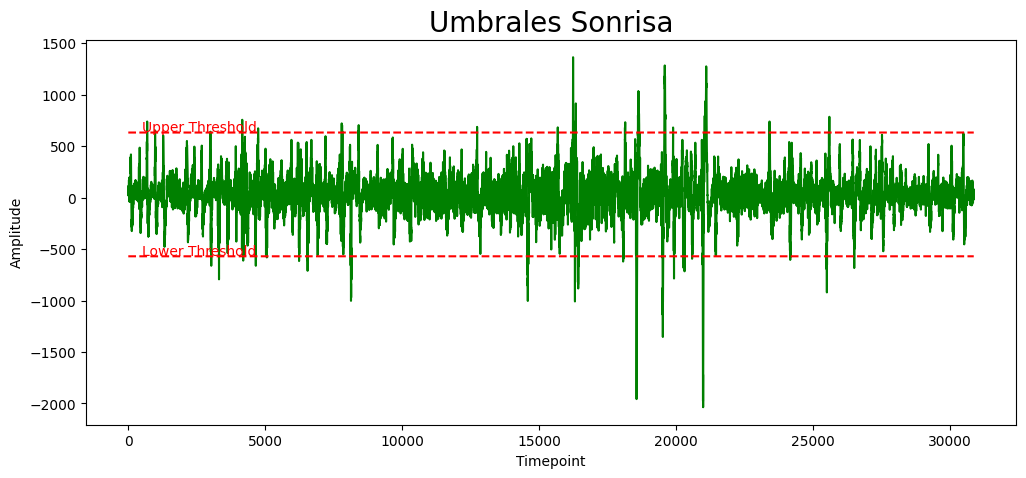

In [51]:
#Calculamos los umbrales superiores e inferiores para determinar qué es una sonrisa y qué no:

umbral_superior9=int(eeg9.mean()+3*eeg9.std())
print("Upper Threshold: {}".format(umbral_superior9))
umbral_inferior9=int(eeg9.mean()-3*eeg9.std())
print("Lower Threshold: {}".format(umbral_inferior9))
plt.figure(figsize=(12,5))
plt.plot(eeg9,color="green")
plt.plot(np.full(len(eeg9),umbral_superior9),'r--')
plt.plot(np.full(len(eeg9),umbral_inferior9),'r--')
plt.ylabel("Amplitude",size=10)
plt.xlabel("Timepoint",size=10)
plt.title("Umbrales Sonrisa",size=20)
plt.annotate("Upper Threshold",xy=(500,umbral_superior9+10),color="red")
plt.annotate("Lower Threshold",xy=(500,umbral_inferior9+10),color="red")
plt.show()

689
978
2998
4157
4739
7789
7803
7811
8400
8404
8407
12729
15674
16228
16246
16328
18126
18133
18601
19563
19881
19884
21035
21056
23392
23398
23403
25573
25585
Sonrisa counter: 29


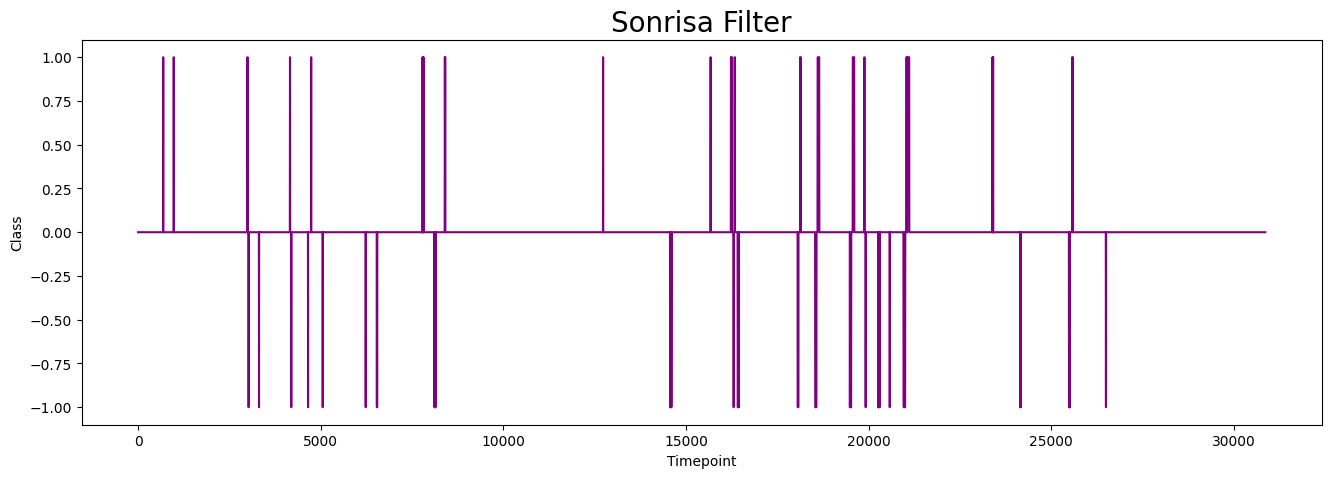

In [52]:
#Contamos los eventos de pestañeos

filtro_eeg9=[]
contador9=0
for i in range(len(eeg9)):
    if i==0:
        filtro_eeg9.append(0)
    elif eeg9[i]>umbral_superior9:
        filtro_eeg9.append(1)
        if eeg9[i-1]<=umbral_superior9:
            print(i)
            contador9=contador9+1
    elif eeg9[i]<umbral_inferior9:
        filtro_eeg9.append(-1)
    else:
        filtro_eeg9.append(0)
        
print("Sonrisa counter: {}".format(contador9))
filtro_eeg9=np.asarray(filtro_eeg9)
plt.figure(figsize=(16,5))
plt.plot(filtro_eeg9,color="purple")
plt.title("Sonrisa Filter",size=20)
plt.ylabel("Class",size=10)
plt.xlabel("Timepoint",size=10)
plt.show()